### **Import Library**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

# Mengabaikan warning yang sering muncul dari statsmodels untuk data kecil
warnings.filterwarnings("ignore")

### **Import Data Hasil Rules**

In [2]:
df = pd.read_csv('D:/kuliah/PA/sakinah-mart/data/rules2023.csv')
df

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'HARMONY MELON', 'HARMONY LEMON', '...",frozenset({'HARMONY STRAWBERY'}),0.000113,1,1235.260000
1,1,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'MOMOGI CKL 6GR'}),0.000113,1,686.255556
2,2,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000113,1,571.879630
3,3,"frozenset({'CLOUD 9 VANILA 15 4G', 'INDOMILK K...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630
4,4,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630
5,5,"frozenset({'EKONOMI E900K', 'NUVO SOAP YLOW 72...",frozenset({'NUVO SOAP BLUE 72G'}),0.000113,1,388.446541
6,6,"frozenset({'INDOMILK STR 190ML BTL', 'INDOMILK...",frozenset({'INDOMILK KID VNL 115ML'}),0.000113,1,348.943503
7,7,"frozenset({'TONGTJI JASMINE 5 S', 'INDOMIE GRG...",frozenset({'INDOMIE AYAM SPECIAL'}),0.000113,1,284.622120
8,8,"frozenset({'KRIPIK SGKG TURBO 180G', 'TWISTER ...",frozenset({'OREO SOFT CAKE 16GR'}),0.000113,1,236.639847
9,9,"frozenset({'INDOMILK KID VNL 115ML', 'TEH GELA...",frozenset({'INDOMILK KID CKL 115ML'}),0.000162,1,183.818452


In [3]:
# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'BIG BLUEBRRY 375ML',
 'CIPTADENT PG FRS 190ML',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'DELFI TOP TRIP/CHO 9GR',
 'EKONOMI E900K',
 'HARMONY LEMON',
 'HARMONY MELON',
 'HARMONY ORANGE',
 'HARMONY STRAWBERY',
 'HERS PROT SCM 60 S',
 'INDOMIE AYAM BAWANG',
 'INDOMIE AYAM SPECIAL',
 'INDOMIE GRG SPECIAL',
 'INDOMIE SOTO MIE',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID STR 115ML',
 'INDOMILK KID VNL 115ML',
 'INDOMILK STR 190ML BTL',
 'KRIPIK SGKG TURBO 180G',
 'MOMOGI CKL 6GR',
 'MOMOGI JGG BKR 6GR',
 'NUVO SOAP BLUE 72G',
 'NUVO SOAP YLOW 72G',
 'OREO SOFT CAKE 16GR',
 'PARAMEX SKT KEPALA',
 'PUCUK HARUM TEH 350ML',
 'ROMA KELAPA 300GR',
 'SUNSILK SHP BLK SHN 160ML',
 'TEH GELAS ORI 170ML',
 'TONGTJI JASMINE 5 S',
 'TWISTER MINI CPP 20GR',
 'WAFELLO COCONUT 37 5G',
 'WALLS POPULAIRE STR',
 'YA KOPI SPESIAL 60GR'}

### **Import Data Transaksi**

In [4]:
groceries = pd.read_excel('D:/kuliah/PA/sakinah-mart/data/final_data2023.xlsx')
groceries

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2023-01-01,2301011000001,FORVITA MARG 200GR,2
1,2023-01-01,2301011000002,SASA SANTAN KLPA 65ML,3
2,2023-01-01,2301011000003,CHEERS 1500ML GREEN,1
3,2023-01-01,2301011000004,SUN KARA 65ML,1
4,2023-01-01,2301011000004,OREO PIKACHU 165 6GR,1
...,...,...,...,...
162975,2023-12-31,2312311020112,KONIDIN 4 S,2
162976,2023-12-31,2312311020113,GOLDA CAPPUCINO 200ML,1
162977,2023-12-31,2312311020113,FLORIDINA ORANGE 360ML,1
162978,2023-12-31,2312311020114,WALLS PP TRICO/48,1


### **Filter Data Transaksi**

In [5]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
9,2023-01-01,2301011000008,OREO SOFT CAKE 16GR,2
34,2023-01-01,2301011000018,PUCUK HARUM TEH 350ML,6
62,2023-01-01,2301011000034,ROMA KELAPA 300GR,1
96,2023-01-01,2301011000040,INDOMIE AYAM BAWANG,1
100,2023-01-01,2301011000041,YA KOPI SPESIAL 60GR,1
...,...,...,...,...
162895,2023-12-31,2312311020095,INDOMIE GRG SPECIAL,4
162902,2023-12-31,2312311020096,INDOMIE GRG SPECIAL,4
162944,2023-12-31,2312311020102,INDOMIE GRG SPECIAL,2
162946,2023-12-31,2312311020102,INDOMIE SOTO MIE,2


In [6]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 35
Nama barang unik:
- OREO SOFT CAKE 16GR
- PUCUK HARUM TEH 350ML
- ROMA KELAPA 300GR
- INDOMIE AYAM BAWANG
- YA KOPI SPESIAL 60GR
- INDOMILK KID CKL 115ML
- INDOMILK STR 190ML BTL
- EKONOMI E900K
- INDOMILK KID STR 115ML
- TWISTER MINI CPP 20GR
- INDOMIE GRG SPECIAL
- INDOMIE AYAM SPECIAL
- WALLS POPULAIRE STR
- MOMOGI CKL 6GR
- HARMONY ORANGE
- HARMONY LEMON
- NUVO SOAP BLUE 72G
- NUVO SOAP YLOW 72G
- TONGTJI JASMINE 5 S
- INDOMIE SOTO MIE
- MOMOGI JGG BKR 6GR
- PARAMEX SKT KEPALA
- KRIPIK SGKG TURBO 180G
- SUNSILK SHP BLK SHN 160ML
- BIG BLUEBRRY 375ML
- HARMONY STRAWBERY
- HERS PROT SCM 60 S
- TEH GELAS ORI 170ML
- DELFI TOP TRIP/CHO 9GR
- CLOUD 9 CHOCO 15 4G
- CLOUD 9 VANILA 15 4G
- HARMONY MELON
- CIPTADENT PG FRS 190ML
- WAFELLO COCONUT 37 5G
- INDOMILK KID VNL 115ML


### **Agregasi Data Mingguan**

In [7]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2023-01-01', end='2023-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [8]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,BIG BLUEBRRY 375ML,1.0,2023-01-01
1,1,CIPTADENT PG FRS 190ML,0.0,2023-01-01
2,1,CLOUD 9 CHOCO 15 4G,0.0,2023-01-01
3,1,CLOUD 9 VANILA 15 4G,0.0,2023-01-01
4,1,DELFI TOP TRIP/CHO 9GR,0.0,2023-01-01
...,...,...,...,...
1850,53,TONGTJI JASMINE 5 S,0.0,2023-12-31
1851,53,TWISTER MINI CPP 20GR,0.0,2023-12-31
1852,53,WAFELLO COCONUT 37 5G,1.0,2023-12-31
1853,53,WALLS POPULAIRE STR,0.0,2023-12-31


### **Pivot Data**

In [9]:
df_pivoted= df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_pivoted.columns.name = None  # hilangkan nama kolom atas
df_pivoted = df_pivoted.reset_index() 
df_pivoted

,TANGGAL,BIG BLUEBRRY 375ML,CIPTADENT PG FRS 190ML,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DELFI TOP TRIP/CHO 9GR,EKONOMI E900K,HARMONY LEMON,HARMONY MELON,HARMONY ORANGE,...,PARAMEX SKT KEPALA,PUCUK HARUM TEH 350ML,ROMA KELAPA 300GR,SUNSILK SHP BLK SHN 160ML,TEH GELAS ORI 170ML,TONGTJI JASMINE 5 S,TWISTER MINI CPP 20GR,WAFELLO COCONUT 37 5G,WALLS POPULAIRE STR,YA KOPI SPESIAL 60GR
0,2023-01-01,1.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,3.0,...,3.0,65.0,11.0,1.0,2.0,7.0,6.0,0.0,20.0,4.0
1,2023-01-08,2.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,4.0,52.0,2.0,1.0,2.0,1.0,3.0,0.0,5.0,2.0
2,2023-01-15,4.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,...,0.0,41.0,5.0,1.0,0.0,0.0,1.0,0.0,8.0,3.0
3,2023-01-22,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,31.0,7.0,0.0,0.0,5.0,2.0,0.0,7.0,3.0
4,2023-01-29,1.0,0.0,5.0,6.0,7.0,5.0,1.0,0.0,4.0,...,2.0,42.0,11.0,3.0,0.0,4.0,4.0,0.0,6.0,6.0
5,2023-02-05,2.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,1.0,...,5.0,48.0,9.0,3.0,0.0,6.0,3.0,0.0,2.0,4.0
6,2023-02-12,0.0,0.0,5.0,2.0,4.0,3.0,0.0,0.0,0.0,...,2.0,33.0,6.0,0.0,0.0,8.0,5.0,0.0,5.0,5.0
7,2023-02-19,0.0,0.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,...,0.0,54.0,12.0,0.0,0.0,3.0,4.0,0.0,10.0,4.0
8,2023-02-26,1.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,...,6.0,41.0,5.0,3.0,0.0,10.0,4.0,0.0,10.0,3.0
9,2023-03-05,1.0,0.0,1.0,3.0,0.0,1.0,1.0,2.0,1.0,...,2.0,29.0,13.0,1.0,0.0,4.0,2.0,0.0,6.0,3.0


In [10]:
# 1. Pisahkan kolom tanggal dan kolom produk
produk_df = df_pivoted.drop(columns=["TANGGAL"])

# 2. Hitung jumlah 0 per kolom
zero_counts = (produk_df == 0).sum()

# 3. Ambil item yang jumlah 0-nya <= 5
filtered_items = zero_counts[zero_counts <= 5].index

# 4. Filter dataframe hanya dengan item yang lolos kriteria 0
filtered_df = produk_df[filtered_items]

# 5. Hitung total penjualan per item
total_sales = filtered_df.sum().sort_values(ascending=False).index

# 6. Ambil 15 item dengan total penjualan tertinggi
# top_3_items = total_sales.head(15).index

# 7. Final dataframe dengan 15 item terbaik
df_final = df_pivoted[["TANGGAL"] + total_sales.tolist()]

In [11]:
df_final.head()

,TANGGAL,INDOMIE GRG SPECIAL,PUCUK HARUM TEH 350ML,INDOMIE SOTO MIE,INDOMIE AYAM BAWANG,INDOMILK KID STR 115ML,WALLS POPULAIRE STR,INDOMIE AYAM SPECIAL,OREO SOFT CAKE 16GR,ROMA KELAPA 300GR,INDOMILK STR 190ML BTL,NUVO SOAP YLOW 72G,KRIPIK SGKG TURBO 180G,NUVO SOAP BLUE 72G,YA KOPI SPESIAL 60GR
0,2023-01-01,174.0,65.0,12.0,14.0,13.0,20.0,8.0,11.0,11.0,7.0,9.0,3.0,10.0,4.0
1,2023-01-08,133.0,52.0,18.0,5.0,1.0,5.0,12.0,12.0,2.0,2.0,1.0,1.0,4.0,2.0
2,2023-01-15,133.0,41.0,14.0,6.0,8.0,8.0,6.0,0.0,5.0,8.0,4.0,0.0,5.0,3.0
3,2023-01-22,123.0,31.0,10.0,26.0,6.0,7.0,0.0,4.0,7.0,1.0,1.0,0.0,0.0,3.0
4,2023-01-29,84.0,42.0,12.0,12.0,11.0,6.0,0.0,7.0,11.0,6.0,12.0,0.0,15.0,6.0


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL     53 non-null     float64       
 2   PUCUK HARUM TEH 350ML   53 non-null     float64       
 3   INDOMIE SOTO MIE        53 non-null     float64       
 4   INDOMIE AYAM BAWANG     53 non-null     float64       
 5   INDOMILK KID STR 115ML  53 non-null     float64       
 6   WALLS POPULAIRE STR     53 non-null     float64       
 7   INDOMIE AYAM SPECIAL    53 non-null     float64       
 8   OREO SOFT CAKE 16GR     53 non-null     float64       
 9   ROMA KELAPA 300GR       53 non-null     float64       
 10  INDOMILK STR 190ML BTL  53 non-null     float64       
 11  NUVO SOAP YLOW 72G      53 non-null     float64       
 12  KRIPIK SGKG TURBO 180G  53 non-null     float64     

In [13]:
# Ubah kolom TANGGAL menjadi datetime
df_final["TANGGAL"] = pd.to_datetime(df_final["TANGGAL"])

# Ubah dari wide ke long format agar cocok untuk plotly express
df_long = df_final.melt(id_vars="TANGGAL", var_name="NAMA BARANG", value_name="QTY")

# Buat line chart
fig = px.line(
    df_long,
    x="TANGGAL",
    y="QTY",
    color="NAMA BARANG",
    title="Jumlah Penjualan per Minggu per Item",
    markers=True,
    labels={"TANGGAL": "Tanggal", "QTY": "Jumlah Terjual", "NAMA BARANG": "Nama Produk"},
    hover_data={"TANGGAL": True, "QTY": True, "NAMA BARANG": True}
)

# Layout tambahan
fig.update_layout(
    legend_title_text='Klik nama produk untuk tampilkan/sembunyikan',
    xaxis_title='Tanggal',
    yaxis_title='Jumlah Terjual',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL     53 non-null     float64       
 2   PUCUK HARUM TEH 350ML   53 non-null     float64       
 3   INDOMIE SOTO MIE        53 non-null     float64       
 4   INDOMIE AYAM BAWANG     53 non-null     float64       
 5   INDOMILK KID STR 115ML  53 non-null     float64       
 6   WALLS POPULAIRE STR     53 non-null     float64       
 7   INDOMIE AYAM SPECIAL    53 non-null     float64       
 8   OREO SOFT CAKE 16GR     53 non-null     float64       
 9   ROMA KELAPA 300GR       53 non-null     float64       
 10  INDOMILK STR 190ML BTL  53 non-null     float64       
 11  NUVO SOAP YLOW 72G      53 non-null     float64       
 12  KRIPIK SGKG TURBO 180G  53 non-null     float64     

In [15]:
# Mengubah kolom TANGGAL menjadi datetime dan menjadikannya index
df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
df_final= df_final.set_index('TANGGAL')
df_final = df_final.asfreq('W-SUN') # Menetapkan frekuensi mingguan (Senin)

df_final

,INDOMIE GRG SPECIAL,PUCUK HARUM TEH 350ML,INDOMIE SOTO MIE,INDOMIE AYAM BAWANG,INDOMILK KID STR 115ML,WALLS POPULAIRE STR,INDOMIE AYAM SPECIAL,OREO SOFT CAKE 16GR,ROMA KELAPA 300GR,INDOMILK STR 190ML BTL,NUVO SOAP YLOW 72G,KRIPIK SGKG TURBO 180G,NUVO SOAP BLUE 72G,YA KOPI SPESIAL 60GR
TANGGAL,,,,,,,,,,,,,,
2023-01-01,174.0,65.0,12.0,14.0,13.0,20.0,8.0,11.0,11.0,7.0,9.0,3.0,10.0,4.0
2023-01-08,133.0,52.0,18.0,5.0,1.0,5.0,12.0,12.0,2.0,2.0,1.0,1.0,4.0,2.0
2023-01-15,133.0,41.0,14.0,6.0,8.0,8.0,6.0,0.0,5.0,8.0,4.0,0.0,5.0,3.0
2023-01-22,123.0,31.0,10.0,26.0,6.0,7.0,0.0,4.0,7.0,1.0,1.0,0.0,0.0,3.0
2023-01-29,84.0,42.0,12.0,12.0,11.0,6.0,0.0,7.0,11.0,6.0,12.0,0.0,15.0,6.0
2023-02-05,101.0,48.0,15.0,2.0,6.0,2.0,3.0,9.0,9.0,3.0,6.0,4.0,4.0,4.0
2023-02-12,13.0,33.0,17.0,10.0,7.0,5.0,14.0,5.0,6.0,1.0,2.0,9.0,9.0,5.0
2023-02-19,47.0,54.0,25.0,9.0,5.0,10.0,10.0,5.0,12.0,2.0,4.0,7.0,5.0,4.0
2023-02-26,103.0,41.0,14.0,18.0,10.0,10.0,20.0,12.0,5.0,5.0,5.0,5.0,11.0,3.0


In [16]:
# --- 2. Konfigurasi Forecasting ---
FORECAST_HORIZON = 4  # Berapa minggu ke depan Anda ingin memprediksi
TRAIN_RATIO = 0.8     # Rasio data yang akan digunakan untuk training (e.g., 0.8 = 80%)

# Dapatkan daftar nama item (kolom selain TANGGAL yang sudah jadi index)
item_columns = df_final.columns.tolist()

# Dictionary untuk menyimpan hasil evaluasi dan prediksi
evaluation_results = {}
future_forecasts = pd.DataFrame(index=pd.date_range(start=df_final.index[-1] + pd.Timedelta(weeks=1),
                                                    periods=FORECAST_HORIZON,
                                                    freq='W-SUN'))

In [17]:
# --- Fungsi untuk menghitung MAPE kustom ---
# Mengabaikan nilai aktual nol untuk menghindari pembagian dengan nol
def mean_absolute_percentage_error(y_true, y_pred):
    # Mengonversi ke numpy array untuk operasi yang lebih mudah
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Filter keluar nilai aktual yang nol untuk menghindari pembagian dengan nol
    non_zero_actuals = y_true != 0
    if not np.any(non_zero_actuals): # Jika tidak ada nilai aktual yang tidak nol
        return np.nan # Tidak dapat menghitung MAPE jika semua aktual adalah nol

    y_true_filtered = y_true[non_zero_actuals]
    y_pred_filtered = y_pred[non_zero_actuals]

    # Menghitung persentase error
    # Tambahkan epsilon kecil ke penyebut jika Anda ingin mencoba mencegah inf
    # Namun, untuk 0, lebih baik diabaikan seperti di atas.
    # Disini kita mengabaikan y_true = 0, jadi tidak perlu epsilon lagi.
    errors = np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)
    return np.mean(errors) * 100


--- Memulai Proses Forecasting dan Evaluasi ---

Memproses Item: INDOMIE GRG SPECIAL
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMIE GRG SPECIAL (periode evaluasi):
            Actual  Predicted
2023-10-22    94.0       74.0
2023-10-29   147.0       72.0
2023-11-05    85.0       70.0
2023-11-12   156.0       68.0
2023-11-19    84.0       66.0
2023-11-26   132.0       65.0
2023-12-03   113.0       63.0
2023-12-10   110.0       61.0
2023-12-17    99.0       59.0
2023-12-24   117.0       57.0
2023-12-31    27.0       56.0

  Evaluasi Model INDOMIE GRG SPECIAL:
  MAE (Mean Absolute Error): 46.45
  RMSE (Root Mean Squared Error): 52.00
  MAPE (Mean Absolute Percentage Error): 46.04%

  Prediksi Penjualan INDOMIE GRG SPECIAL untuk 4 minggu ke depan:
2024-01-0

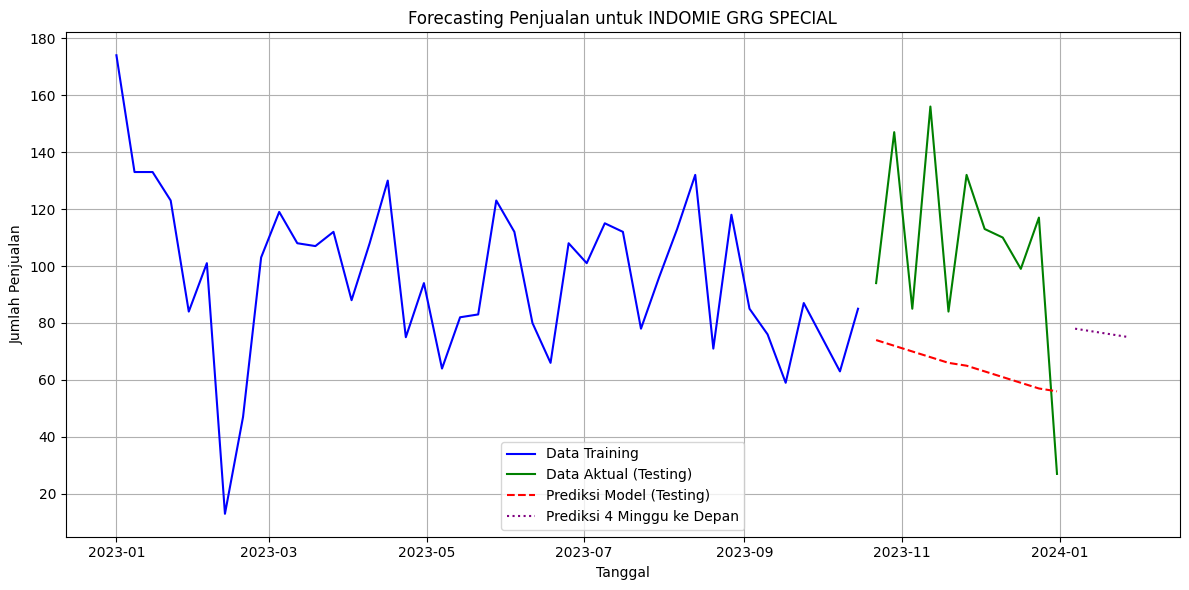



Memproses Item: PUCUK HARUM TEH 350ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk PUCUK HARUM TEH 350ML (periode evaluasi):
            Actual  Predicted
2023-10-22    36.0       44.0
2023-10-29    52.0       44.0
2023-11-05    96.0       43.0
2023-11-12    76.0       43.0
2023-11-19    37.0       43.0
2023-11-26    53.0       43.0
2023-12-03    23.0       43.0
2023-12-10    41.0       43.0
2023-12-17    34.0       43.0
2023-12-24    19.0       43.0
2023-12-31     2.0       43.0

  Evaluasi Model PUCUK HARUM TEH 350ML:
  MAE (Mean Absolute Error): 19.45
  RMSE (Root Mean Squared Error): 25.05
  MAPE (Mean Absolute Percentage Error): 224.18%

  Prediksi Penjualan PUCUK HARUM TEH 350ML untuk 4 minggu ke depan:
2024-01-07    26.0
2024-01-14    26.0
2024-01-21

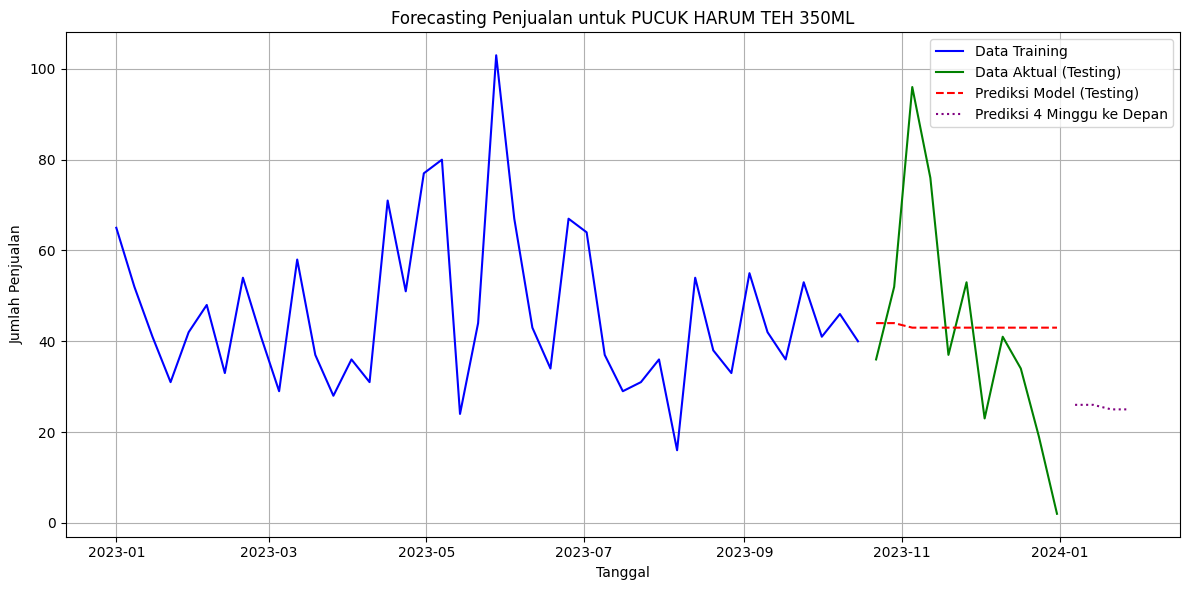



Memproses Item: INDOMIE SOTO MIE
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMIE SOTO MIE (periode evaluasi):
            Actual  Predicted
2023-10-22    11.0       13.0
2023-10-29    29.0       13.0
2023-11-05    10.0       13.0
2023-11-12    16.0       13.0
2023-11-19    12.0       13.0
2023-11-26    31.0       13.0
2023-12-03    13.0       13.0
2023-12-10    25.0       13.0
2023-12-17    22.0       13.0
2023-12-24    18.0       13.0
2023-12-31     3.0       13.0

  Evaluasi Model INDOMIE SOTO MIE:
  MAE (Mean Absolute Error): 7.18
  RMSE (Root Mean Squared Error): 9.31
  MAPE (Mean Absolute Percentage Error): 58.05%

  Prediksi Penjualan INDOMIE SOTO MIE untuk 4 minggu ke depan:
2024-01-07    16.0
2024-01-14    16.0
2024-01-21    16.0
2024-01-28    

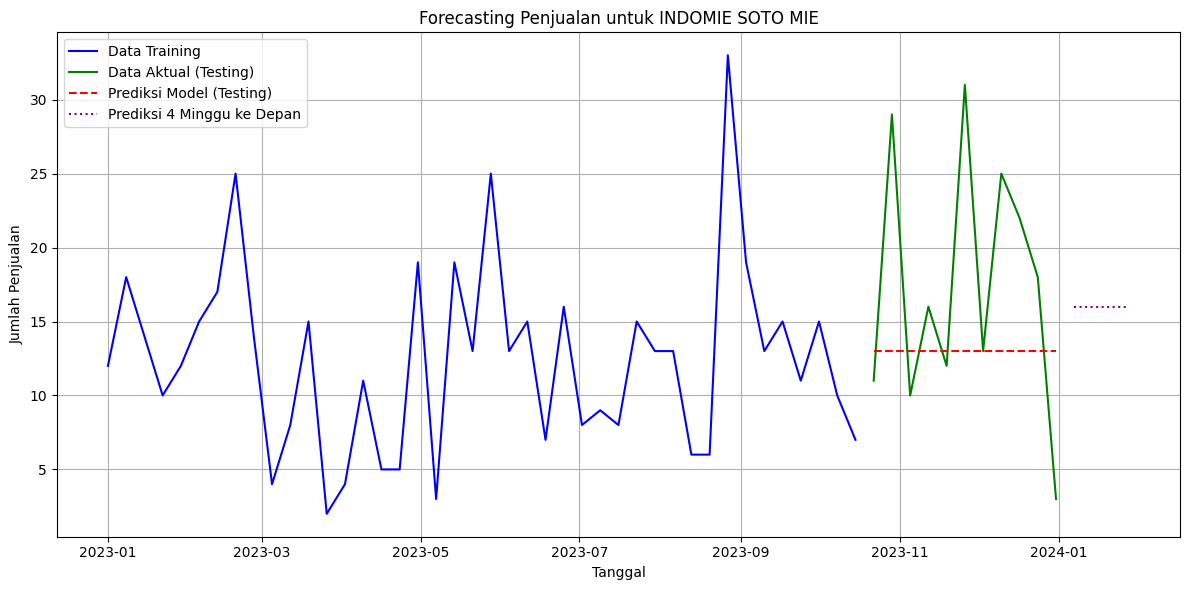



Memproses Item: INDOMIE AYAM BAWANG
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMIE AYAM BAWANG (periode evaluasi):
            Actual  Predicted
2023-10-22    13.0        9.0
2023-10-29    16.0        9.0
2023-11-05     6.0        9.0
2023-11-12    21.0        9.0
2023-11-19     6.0        9.0
2023-11-26    10.0        9.0
2023-12-03    11.0        9.0
2023-12-10     4.0        9.0
2023-12-17    11.0        9.0
2023-12-24     4.0        9.0
2023-12-31     0.0        8.0

  Evaluasi Model INDOMIE AYAM BAWANG:
  MAE (Mean Absolute Error): 4.73
  RMSE (Root Mean Squared Error): 5.64
  MAPE (Mean Absolute Percentage Error): 52.80%

  Prediksi Penjualan INDOMIE AYAM BAWANG untuk 4 minggu ke depan:
2024-01-07    8.0
2024-01-14    8.0
2024-01-21    8.0
2024-

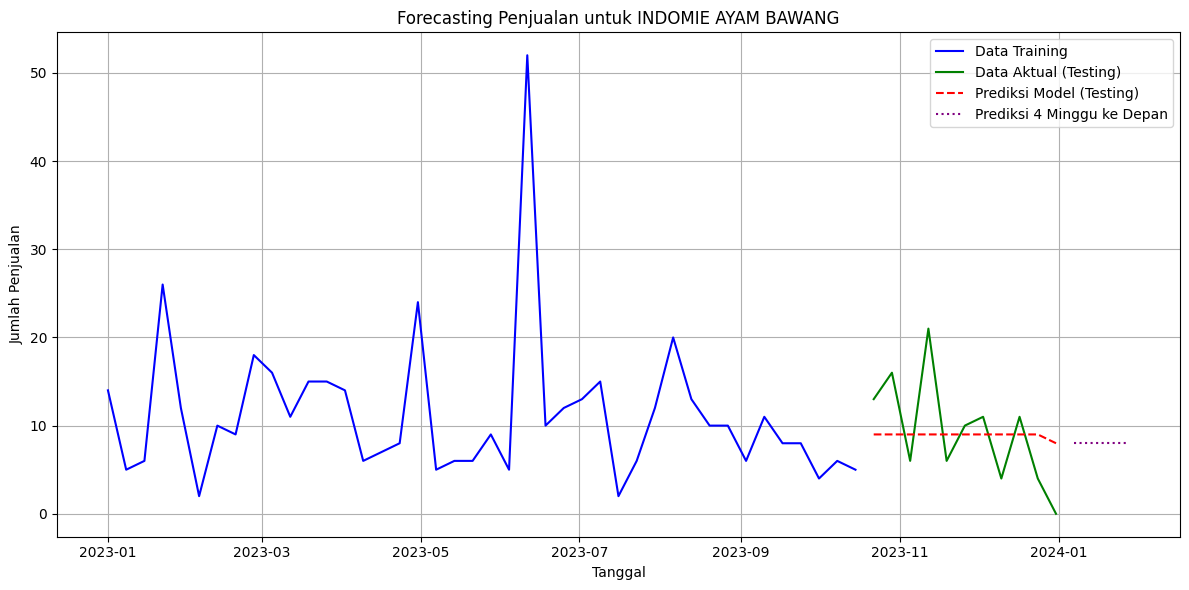



Memproses Item: INDOMILK KID STR 115ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMILK KID STR 115ML (periode evaluasi):
            Actual  Predicted
2023-10-22    18.0        6.0
2023-10-29    15.0        6.0
2023-11-05     6.0        6.0
2023-11-12    20.0        6.0
2023-11-19     6.0        6.0
2023-11-26    10.0        6.0
2023-12-03    11.0        6.0
2023-12-10    34.0        6.0
2023-12-17    22.0        6.0
2023-12-24    18.0        6.0
2023-12-31     5.0        6.0

  Evaluasi Model INDOMILK KID STR 115ML:
  MAE (Mean Absolute Error): 9.18
  RMSE (Root Mean Squared Error): 12.24
  MAPE (Mean Absolute Percentage Error): 47.62%

  Prediksi Penjualan INDOMILK KID STR 115ML untuk 4 minggu ke depan:
2024-01-07    14.0
2024-01-14    14.0
2024-01-

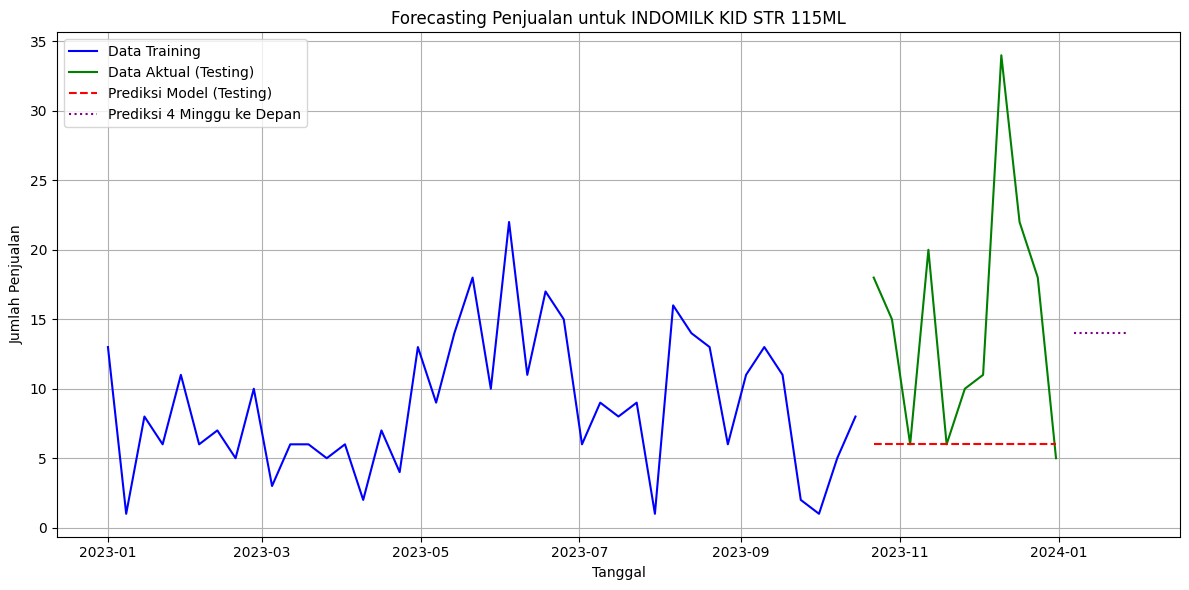



Memproses Item: WALLS POPULAIRE STR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk WALLS POPULAIRE STR (periode evaluasi):
            Actual  Predicted
2023-10-22     4.0       11.0
2023-10-29     9.0       11.0
2023-11-05     7.0       11.0
2023-11-12    11.0       11.0
2023-11-19    14.0       11.0
2023-11-26    12.0       11.0
2023-12-03     0.0       11.0
2023-12-10     7.0       11.0
2023-12-17    11.0       11.0
2023-12-24    12.0       11.0
2023-12-31     0.0       11.0

  Evaluasi Model WALLS POPULAIRE STR:
  MAE (Mean Absolute Error): 4.00
  RMSE (Root Mean Squared Error): 5.54
  MAPE (Mean Absolute Percentage Error): 38.84%

  Prediksi Penjualan WALLS POPULAIRE STR untuk 4 minggu ke depan:
2024-01-07    9.0
2024-01-14    9.0
2024-01-21    9.0
2024-

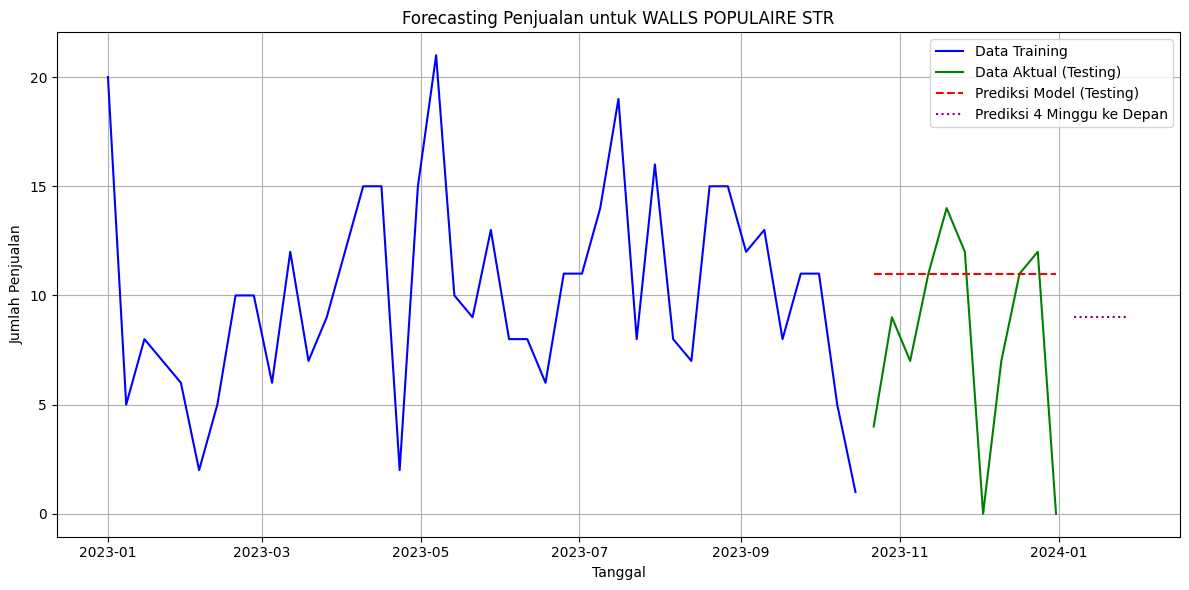



Memproses Item: INDOMIE AYAM SPECIAL
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMIE AYAM SPECIAL (periode evaluasi):
            Actual  Predicted
2023-10-22    11.0        6.0
2023-10-29    12.0        5.0
2023-11-05     8.0        5.0
2023-11-12     6.0        5.0
2023-11-19    12.0        5.0
2023-11-26    13.0        5.0
2023-12-03     8.0        5.0
2023-12-10     9.0        5.0
2023-12-17     5.0        5.0
2023-12-24    14.0        5.0
2023-12-31     0.0        5.0

  Evaluasi Model INDOMIE AYAM SPECIAL:
  MAE (Mean Absolute Error): 4.73
  RMSE (Root Mean Squared Error): 5.46
  MAPE (Mean Absolute Percentage Error): 42.41%

  Prediksi Penjualan INDOMIE AYAM SPECIAL untuk 4 minggu ke depan:
2024-01-07    8.0
2024-01-14    8.0
2024-01-21    8.0
2

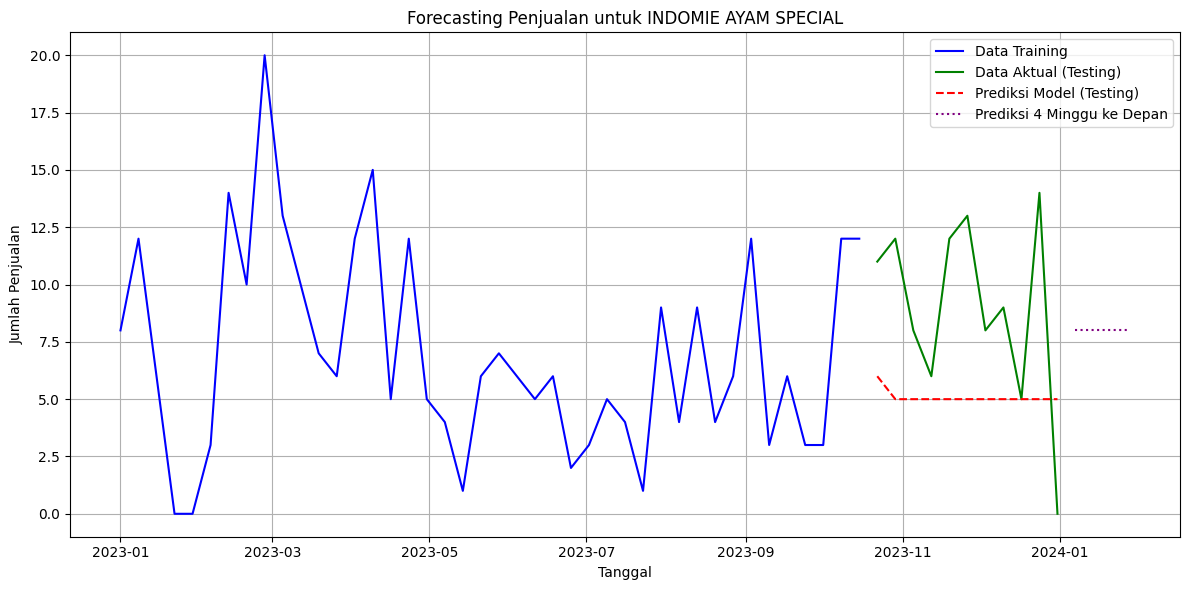



Memproses Item: OREO SOFT CAKE 16GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk OREO SOFT CAKE 16GR (periode evaluasi):
            Actual  Predicted
2023-10-22     7.0        7.0
2023-10-29    12.0        7.0
2023-11-05     7.0        7.0
2023-11-12     5.0        7.0
2023-11-19     2.0        7.0
2023-11-26     9.0        7.0
2023-12-03    17.0        7.0
2023-12-10     6.0        7.0
2023-12-17    14.0        7.0
2023-12-24    12.0        7.0
2023-12-31     1.0        7.0

  Evaluasi Model OREO SOFT CAKE 16GR:
  MAE (Mean Absolute Error): 3.91
  RMSE (Root Mean Squared Error): 4.95
  MAPE (Mean Absolute Percentage Error): 101.91%

  Prediksi Penjualan OREO SOFT CAKE 16GR untuk 4 minggu ke depan:
2024-01-07    8.0
2024-01-14    8.0
2024-01-21    8.0
2024

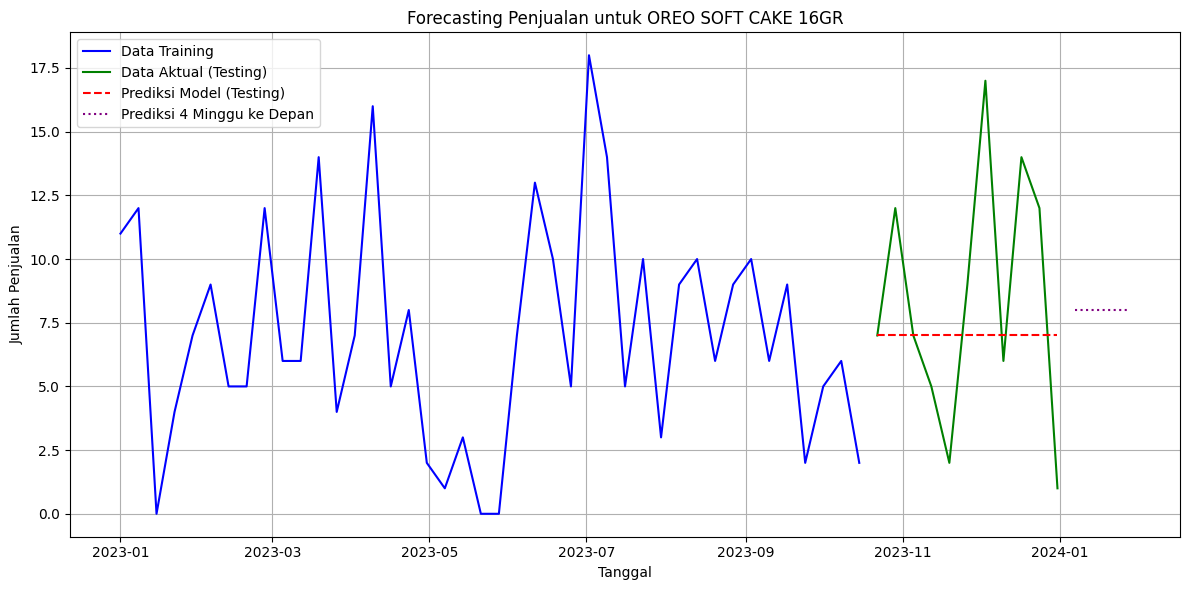



Memproses Item: ROMA KELAPA 300GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk ROMA KELAPA 300GR (periode evaluasi):
            Actual  Predicted
2023-10-22     2.0        5.0
2023-10-29     4.0        4.0
2023-11-05     5.0        4.0
2023-11-12     4.0        4.0
2023-11-19     4.0        4.0
2023-11-26    13.0        4.0
2023-12-03     3.0        4.0
2023-12-10     2.0        4.0
2023-12-17     6.0        4.0
2023-12-24    12.0        4.0
2023-12-31     1.0        4.0

  Evaluasi Model ROMA KELAPA 300GR:
  MAE (Mean Absolute Error): 2.64
  RMSE (Root Mean Squared Error): 3.97
  MAPE (Mean Absolute Percentage Error): 70.23%

  Prediksi Penjualan ROMA KELAPA 300GR untuk 4 minggu ke depan:
2024-01-07    4.0
2024-01-14    4.0
2024-01-21    4.0
2024-01-28   

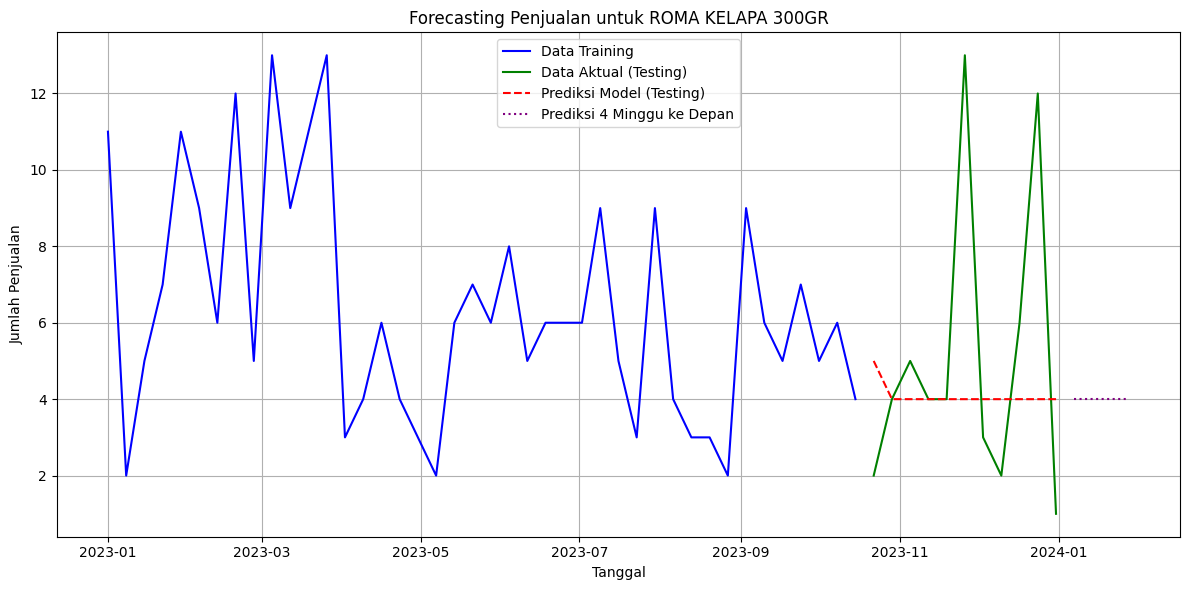



Memproses Item: INDOMILK STR 190ML BTL
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMILK STR 190ML BTL (periode evaluasi):
            Actual  Predicted
2023-10-22     3.0        5.0
2023-10-29    10.0        5.0
2023-11-05     3.0        5.0
2023-11-12     8.0        5.0
2023-11-19     9.0        5.0
2023-11-26    13.0        5.0
2023-12-03     8.0        5.0
2023-12-10    14.0        5.0
2023-12-17     9.0        5.0
2023-12-24     3.0        5.0
2023-12-31     1.0        5.0

  Evaluasi Model INDOMILK STR 190ML BTL:
  MAE (Mean Absolute Error): 4.18
  RMSE (Root Mean Squared Error): 4.75
  MAPE (Mean Absolute Percentage Error): 85.43%

  Prediksi Penjualan INDOMILK STR 190ML BTL untuk 4 minggu ke depan:
2024-01-07    7.0
2024-01-14    7.0
2024-01-21 

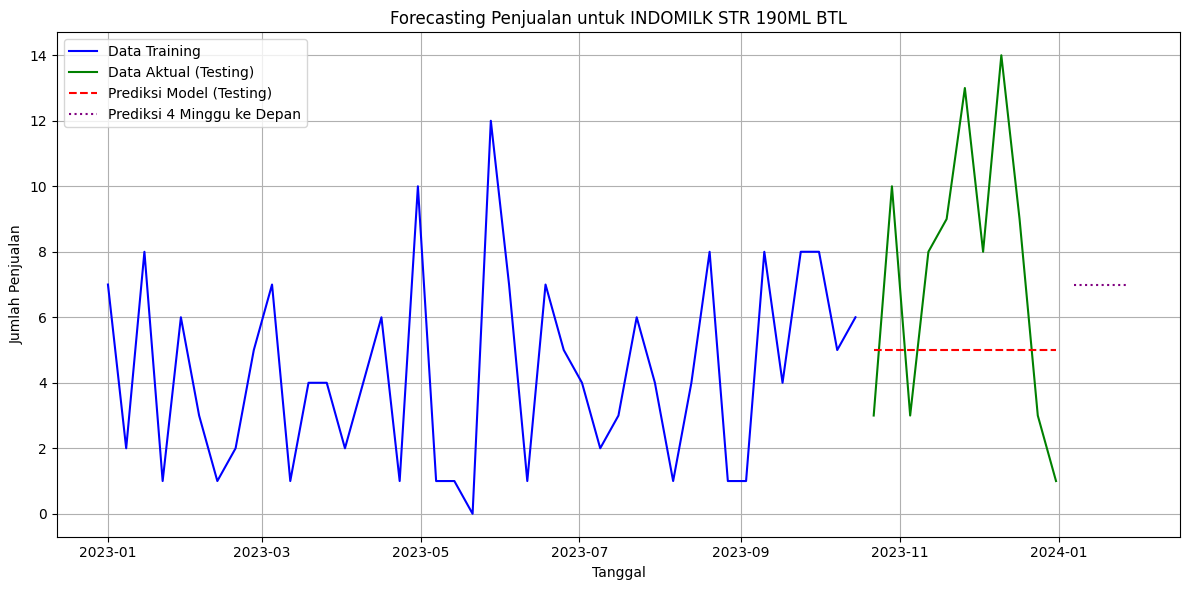



Memproses Item: NUVO SOAP YLOW 72G
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk NUVO SOAP YLOW 72G (periode evaluasi):
            Actual  Predicted
2023-10-22     1.0        4.0
2023-10-29     8.0        4.0
2023-11-05     6.0        4.0
2023-11-12     4.0        4.0
2023-11-19     3.0        4.0
2023-11-26     4.0        4.0
2023-12-03     6.0        4.0
2023-12-10     2.0        4.0
2023-12-17     3.0        4.0
2023-12-24     1.0        3.0
2023-12-31     0.0        3.0

  Evaluasi Model NUVO SOAP YLOW 72G:
  MAE (Mean Absolute Error): 1.82
  RMSE (Root Mean Squared Error): 2.17
  MAPE (Mean Absolute Percentage Error): 78.33%

  Prediksi Penjualan NUVO SOAP YLOW 72G untuk 4 minggu ke depan:
2024-01-07    3.0
2024-01-14    3.0
2024-01-21    3.0
2024-01-2

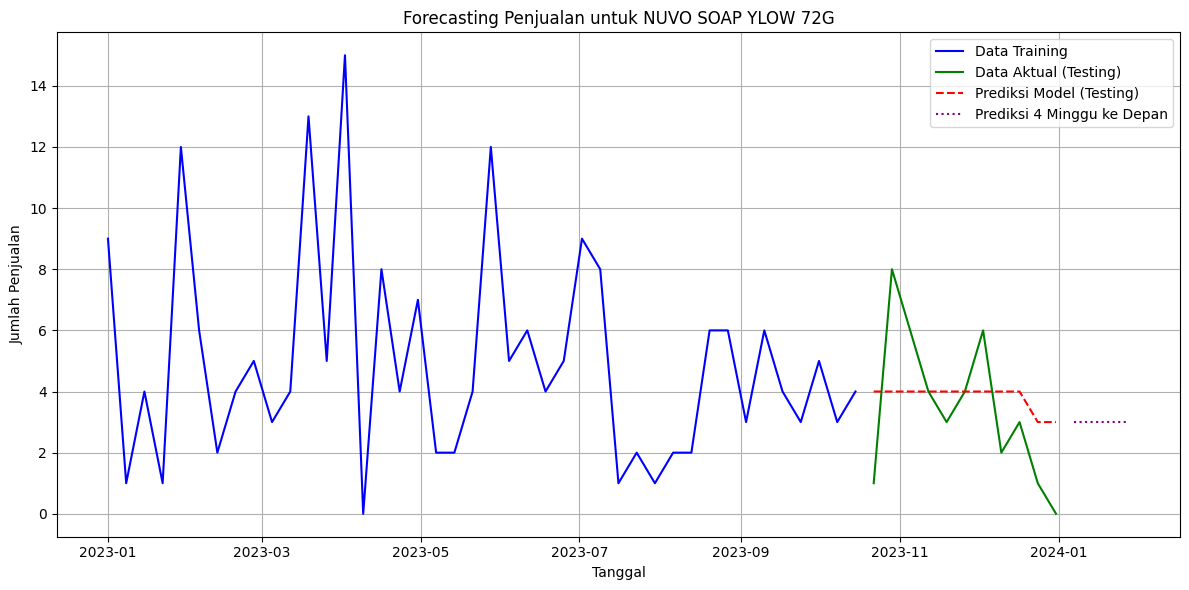



Memproses Item: KRIPIK SGKG TURBO 180G
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk KRIPIK SGKG TURBO 180G (periode evaluasi):
            Actual  Predicted
2023-10-22     1.0        3.0
2023-10-29     5.0        3.0
2023-11-05     0.0        3.0
2023-11-12     4.0        3.0
2023-11-19     1.0        3.0
2023-11-26     0.0        3.0
2023-12-03     5.0        3.0
2023-12-10     6.0        3.0
2023-12-17     3.0        3.0
2023-12-24     3.0        3.0
2023-12-31     1.0        3.0

  Evaluasi Model KRIPIK SGKG TURBO 180G:
  MAE (Mean Absolute Error): 1.82
  RMSE (Root Mean Squared Error): 2.09
  MAPE (Mean Absolute Percentage Error): 83.89%

  Prediksi Penjualan KRIPIK SGKG TURBO 180G untuk 4 minggu ke depan:
2024-01-07    3.0
2024-01-14    3.0
2024-01-21 

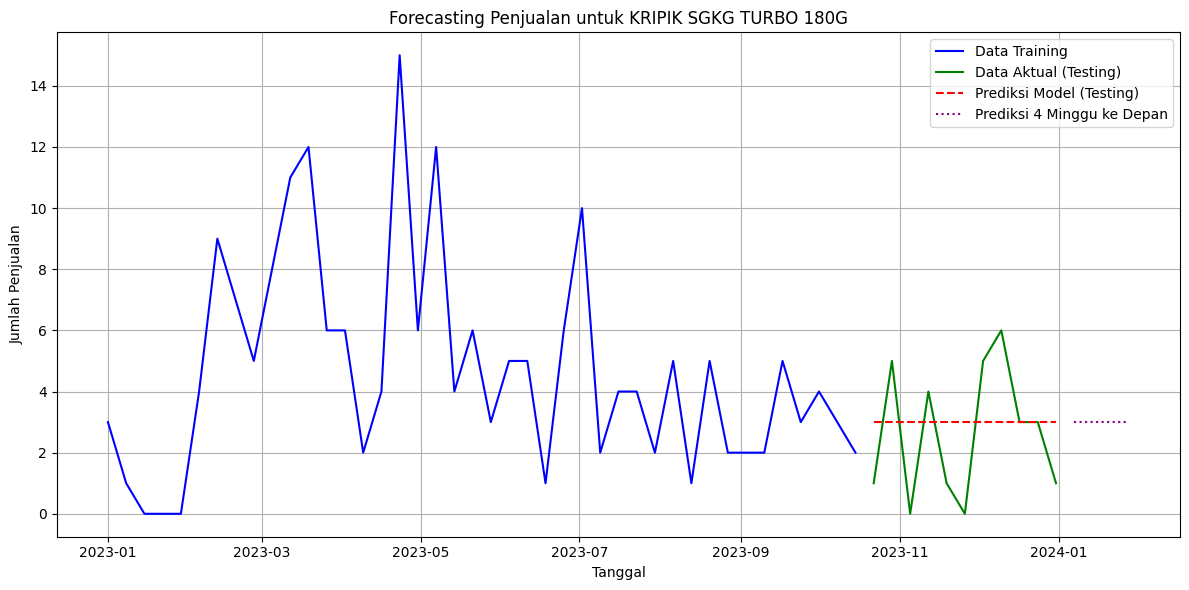



Memproses Item: NUVO SOAP BLUE 72G
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk NUVO SOAP BLUE 72G (periode evaluasi):
            Actual  Predicted
2023-10-22     1.0        2.0
2023-10-29     9.0        2.0
2023-11-05    10.0        2.0
2023-11-12     5.0        2.0
2023-11-19     6.0        1.0
2023-11-26     5.0        1.0
2023-12-03     6.0        1.0
2023-12-10     5.0        1.0
2023-12-17     2.0        1.0
2023-12-24     0.0        1.0
2023-12-31     0.0        1.0

  Evaluasi Model NUVO SOAP BLUE 72G:
  MAE (Mean Absolute Error): 3.64
  RMSE (Root Mean Squared Error): 4.35
  MAPE (Mean Absolute Percentage Error): 77.16%

  Prediksi Penjualan NUVO SOAP BLUE 72G untuk 4 minggu ke depan:
2024-01-07    3.0
2024-01-14    3.0
2024-01-21    3.0
2024-01-2

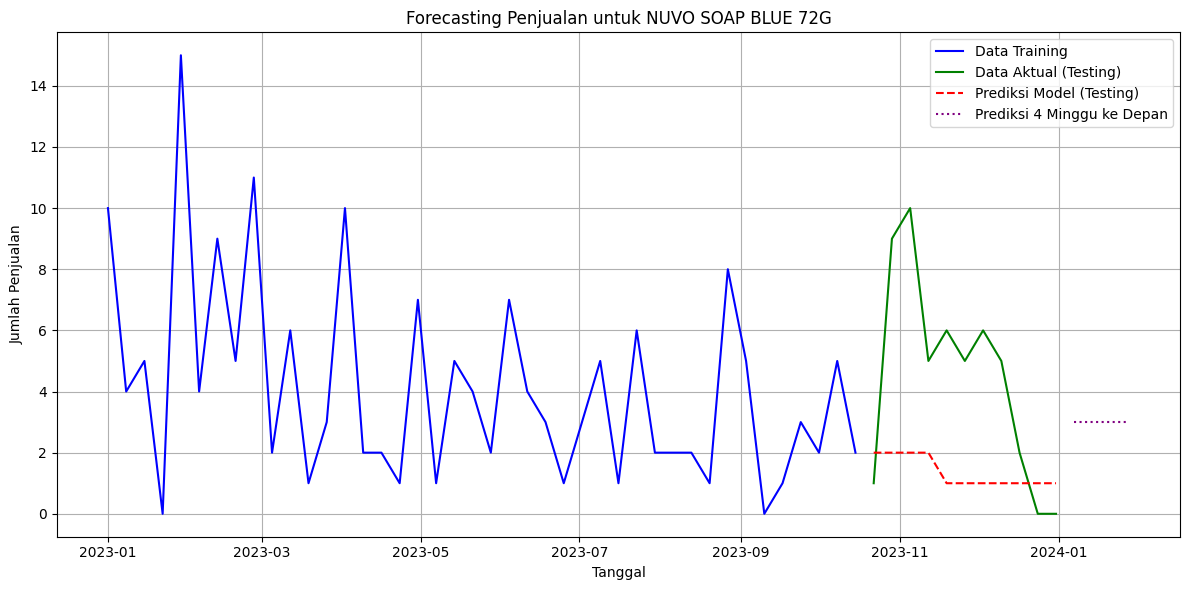



Memproses Item: YA KOPI SPESIAL 60GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2023-10-15
  Data testing awal: 2023-10-22
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk YA KOPI SPESIAL 60GR (periode evaluasi):
            Actual  Predicted
2023-10-22     5.0        4.0
2023-10-29     8.0        4.0
2023-11-05     1.0        4.0
2023-11-12     2.0        4.0
2023-11-19     4.0        4.0
2023-11-26    13.0        4.0
2023-12-03     0.0        4.0
2023-12-10     4.0        4.0
2023-12-17     2.0        4.0
2023-12-24     3.0        4.0
2023-12-31     0.0        4.0

  Evaluasi Model YA KOPI SPESIAL 60GR:
  MAE (Mean Absolute Error): 2.73
  RMSE (Root Mean Squared Error): 3.67
  MAPE (Mean Absolute Percentage Error): 74.73%

  Prediksi Penjualan YA KOPI SPESIAL 60GR untuk 4 minggu ke depan:
2024-01-07    4.0
2024-01-14    4.0
2024-01-21    4.0
2

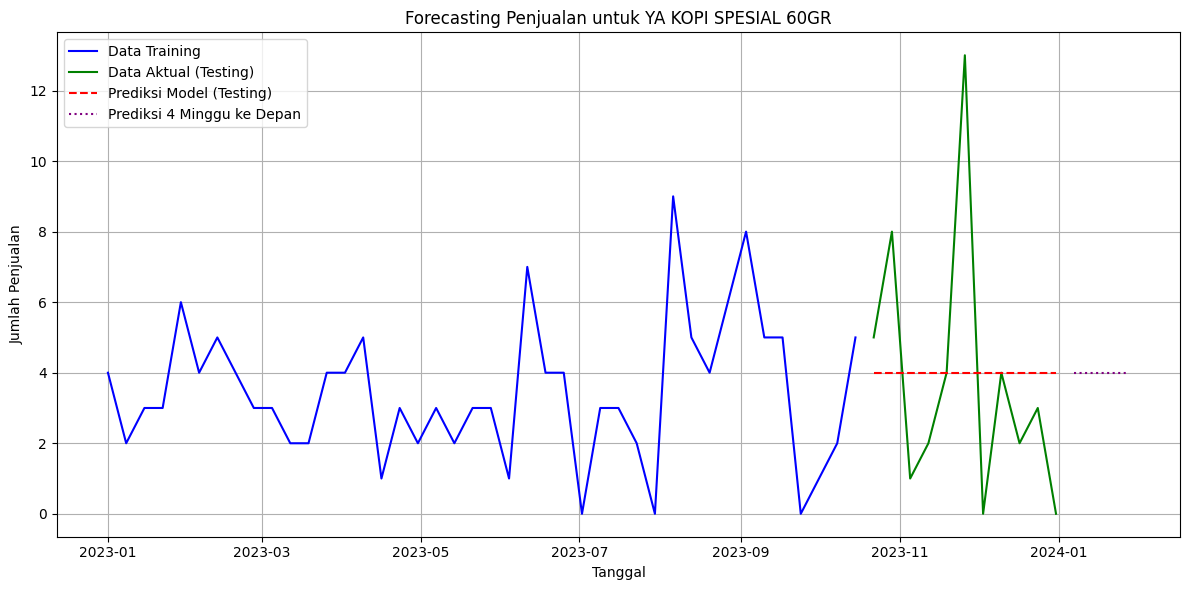

In [18]:
# --- 3. Looping untuk Setiap Item dan Melakukan Forecasting ---
print("\n--- Memulai Proses Forecasting dan Evaluasi ---\n")

# Menentukan jumlah minimum observasi yang diperlukan
# Untuk model time series sederhana (misal SES), setidaknya 2 data (1 train, 1 test).
# Untuk ExponentialSmoothing dengan trend, idealnya lebih dari itu (misal 3 atau 4).
MIN_OBSERVATIONS_REQUIRED = 3 # Minimal 2 data training, 1 data testing

for item in item_columns:
    print(f"===========================================================")
    print(f"Memproses Item: {item}")
    print(f"===========================================================")

    ts_data = df_final[item].copy()

    # Hitung ukuran train dan test berdasarkan rasio
    total_obs = len(ts_data)
    train_size = int(total_obs * TRAIN_RATIO)
    test_size_dynamic = total_obs - train_size

    # Penanganan kasus data yang sangat sedikit
    # Pastikan minimal ada data untuk training dan testing
    if total_obs < MIN_OBSERVATIONS_REQUIRED:
        print(f"  [SKIPPED] Data terlalu sedikit ({total_obs} observasi) untuk {item}. Minimal {MIN_OBSERVATIONS_REQUIRED} data diperlukan untuk forecasting dan evaluasi.")
        evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': 'Not enough data for model fit and split'}
        future_forecasts[item] = np.nan
        continue

    # Sesuaikan ukuran train/test jika hasil perhitungan rasio menghasilkan 0 atau nilai yang terlalu kecil
    if train_size < 1:
        train_size = 1 # Minimal 1 data untuk training
    if test_size_dynamic < 1:
        test_size_dynamic = 1 # Minimal 1 data untuk testing

    # Jika setelah penyesuaian, total data menjadi kurang dari yang dibutuhkan (misal karena penyesuaian train_size & test_size)
    if train_size + test_size_dynamic > total_obs:
        # Ini bisa terjadi jika total_obs sangat kecil dan kita forced train_size/test_size ke 1
        # Dalam kasus ini, kita bisa alokasikan sisanya ke train, atau ulang alokasi
        # Untuk kesederhanaan, jika total_obs sangat kecil dan train_size sudah 1, sisanya ke test_size_dynamic
        test_size_dynamic = total_obs - train_size
        if test_size_dynamic < 1: # Kalau masih 0, berarti data terlalu sedikit
            print(f"  [SKIPPED] Data terlalu sedikit ({total_obs} observasi) untuk {item} setelah penyesuaian rasio. Tidak bisa membuat train/test set yang valid.")
            evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': 'Not enough data for valid split'}
            future_forecasts[item] = np.nan
            continue

    # Memisahkan data training dan testing secara kronologis (data terakhir untuk testing)
    train_data = ts_data[:-test_size_dynamic]
    test_data = ts_data[-test_size_dynamic:]

    # Pastikan data training tidak kosong (bisa terjadi jika total_obs sangat kecil dan test_size_dynamic mengambil semua)
    if len(train_data) == 0:
        print(f"  [SKIPPED] Data training kosong untuk {item} setelah split. Total data: {total_obs}, Train size: {train_size}, Test size: {test_size_dynamic}.")
        evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': 'Training data is empty after split'}
        future_forecasts[item] = np.nan
        continue


    print(f"  Total observasi: {total_obs}")
    print(f"  Ukuran data training: {len(train_data)} observasi ({TRAIN_RATIO*100:.0f}% dari total)")
    print(f"  Ukuran data testing: {len(test_data)} observasi (Sisa)")
    print(f"  Data training terakhir: {train_data.index[-1].strftime('%Y-%m-%d')}")
    print(f"  Data testing awal: {test_data.index[0].strftime('%Y-%m-%d')}")

    # --- Pemilihan Model (Exponential Smoothing) ---
    try:
        model = ExponentialSmoothing(train_data,
                                     trend='add',
                                     seasonal=None,
                                     initialization_method="estimated"
                                    )
        model_fit = model.fit()
        print(f"  Model ExponentialSmoothing (Trend='add') berhasil di-fit.")
    except Exception as e:
        print(f"  Gagal fit model ExponentialSmoothing (Trend='add') untuk {item}: {e}. Mencoba SimpleExpSmoothing.")
        # Fallback ke SimpleExpSmoothing jika model yang lebih kompleks gagal
        try:
            model = SimpleExpSmoothing(train_data, initialization_method="estimated")
            model_fit = model.fit()
            print(f"  Menggunakan SimpleExpSmoothing untuk {item}.")
        except Exception as e_simple:
            print(f"  Gagal fit SimpleExpSmoothing untuk {item}: {e_simple}. Melewatkan item ini.")
            evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': f'Model fit failed: {e_simple}'}
            future_forecasts[item] = np.nan
            continue


    # --- Evaluasi Model ---
    # Membuat prediksi untuk periode test
    predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

    # Pastikan prediksi tidak negatif dan bulatkan ke integer
    predictions = np.maximum(0, predictions).round()

    print(f"\n  Prediksi vs Aktual untuk {item} (periode evaluasi):")
    eval_df = pd.DataFrame({'Actual': test_data, 'Predicted': predictions})
    print(eval_df)

    # Menghitung Metrik Evaluasi
    mae = mean_absolute_error(test_data, predictions)
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    mape = mean_absolute_percentage_error(test_data, predictions)

    evaluation_results[item] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    print(f"\n  Evaluasi Model {item}:")
    print(f"  MAE (Mean Absolute Error): {mae:.2f}")
    print(f"  RMSE (Root Mean Squared Error): {rmse:.2f}")
    if not np.isnan(mape):
        print(f"  MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    else:
        print(f"  MAPE: Tidak dapat dihitung (tidak ada nilai aktual > 0 dalam periode testing).")

    # --- Forecasting Masa Depan ---
    # Memprediksi untuk N minggu ke depan dari data TERAKHIR (termasuk data test)
    # Kita akan fit ulang model dengan data LENGKAP untuk prediksi masa depan yang paling akurat
    try:
        final_model = ExponentialSmoothing(ts_data, # Menggunakan seluruh data ts_data
                                        trend='add',
                                        seasonal=None,
                                        initialization_method="estimated"
                                       )
        final_model_fit = final_model.fit()
    except Exception:
        # Fallback jika model dengan tren gagal pada data lengkap
        final_model = SimpleExpSmoothing(ts_data, initialization_method="estimated")
        final_model_fit = final_model.fit()

    future_predictions = final_model_fit.predict(start=df_final.index[-1] + pd.Timedelta(weeks=1),
                                                 end=df_final.index[-1] + pd.Timedelta(weeks=FORECAST_HORIZON))

    # Pastikan prediksi tidak negatif dan bulatkan ke integer
    future_predictions = np.maximum(0, future_predictions).round()

    print(f"\n  Prediksi Penjualan {item} untuk {FORECAST_HORIZON} minggu ke depan:")
    print(future_predictions.to_string())

    # Simpan hasil prediksi ke DataFrame future_forecasts
    future_forecasts[item] = future_predictions.values

    # --- Visualisasi (Opsional) ---
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Data Training', color='blue')
    plt.plot(test_data.index, test_data, label='Data Aktual (Testing)', color='green')
    plt.plot(predictions.index, predictions, label='Prediksi Model (Testing)', color='red', linestyle='--')
    plt.plot(future_predictions.index, future_predictions, label=f'Prediksi {FORECAST_HORIZON} Minggu ke Depan', color='purple', linestyle=':')
    plt.title(f'Forecasting Penjualan untuk {item}')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penjualan')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n")

In [19]:
# --- 4. Ringkasan Hasil Evaluasi dan Prediksi ---
print("\n--- Ringkasan Hasil Evaluasi Model ---")
eval_df_summary = pd.DataFrame.from_dict(evaluation_results, orient='index')

# !!! BARIS INI YANG DITAMBAHKAN/DIMODIFIKASI !!!
# Urutkan DataFrame berdasarkan MAPE (terkecil ke terbesar), lalu MAE (terkecil ke terbesar)
eval_df_summary_sorted = eval_df_summary.sort_values(by='MAPE', ascending=True)

print(eval_df_summary_sorted) # Gunakan DataFrame yang sudah diurutkan

print("\n📈 Rata-rata Performa Semua Produk:")
print(f"Avg MAE: {eval_df_summary_sorted['MAE'].mean():.2f}")
print(f"Avg RMSE: {eval_df_summary_sorted['RMSE'].mean():.2f}")
print(f"Avg MAPE: {eval_df_summary_sorted['MAPE'].mean():.2f}%")

print("\n--- Prediksi Penjualan untuk {} Minggu Ke Depan ---".format(FORECAST_HORIZON))
print(future_forecasts.to_string())


--- Ringkasan Hasil Evaluasi Model ---
                              MAE       RMSE        MAPE
WALLS POPULAIRE STR      4.000000   5.543219   38.844797
INDOMIE AYAM SPECIAL     4.727273   5.460603   42.405650
INDOMIE GRG SPECIAL     46.454545  52.004370   46.038837
INDOMILK KID STR 115ML   9.181818  12.236310   47.624372
INDOMIE AYAM BAWANG      4.727273   5.640761   52.802572
INDOMIE SOTO MIE         7.181818   9.307866   58.047480
ROMA KELAPA 300GR        2.636364   3.965763   70.233100
YA KOPI SPESIAL 60GR     2.727273   3.668044   74.729345
NUVO SOAP BLUE 72G       3.636364   4.348458   77.160494
NUVO SOAP YLOW 72G       1.818182   2.174229   78.333333
KRIPIK SGKG TURBO 180G   1.818182   2.088932   83.888889
INDOMILK STR 190ML BTL   4.181818   4.748205   85.428460
OREO SOFT CAKE 16GR      3.909091   4.945154  101.913250
PUCUK HARUM TEH 350ML   19.454545  25.052672  224.176483

📈 Rata-rata Performa Semua Produk:
Avg MAE: 8.32
Avg RMSE: 10.08
Avg MAPE: 77.26%

--- Prediksi Penjuala